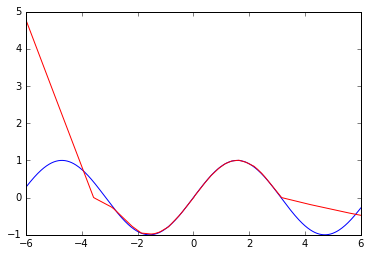

In [ ]:
import os.path
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L

from matplotlib import pyplot as plt
%matplotlib inline

def getSampleData(n):
    x = np.random.randn(n)
    y = np.sin(x)
    return x,y

class MyChain(Chain):
    def __init__(self):
        super(MyChain, self).__init__(
             l1=L.Linear(1, 16),  # Input 1  Outpu 16
             l2=L.Linear(16, 32), # Input 16 output 32
             l3=L.Linear(32, 1), # Input 32 output 1
        )

    def __call__(self,x,t):
        # x is input
        # t is answwer
        # Return error 
        return F.mean_squared_error(self.predict(x),t)

    def  predict(self,x):
        # x is input
        # return network output.
        h1 = F.leaky_relu(self.l1(x))
        h2 = F.leaky_relu(self.l2(h1))
        h3 = F.leaky_relu(self.l3(h2))
        return h3

    def get(self,x):
        # Utiltiy function input real -> output real
        return self.predict(Variable(np.array([x]).astype(np.float32).reshape(1,1))).data[0][0]


losses =[]
from IPython import display

modelFile='EstimateSin.model'

model = MyChain()
if os.path.exists(modelFile):
    serializers.load_npz(modelFile, model)

optimizer = optimizers.Adam()
optimizer.setup(model)

plt.hold(False)

for i in range(3000):
    x,y = getSampleData(200)
    x_ = Variable(x.astype(np.float32).reshape(200,1))
    t_ = Variable(y.astype(np.float32).reshape(200,1))

    model.zerograds()
    loss=model(x_,t_)
    loss.backward()
    optimizer.update()

    losses.append(loss.data)

    if i%10==0:
        x=np.linspace(-6,6,600)
        plt.plot(x,np.sin(x))
        plt.hold(True)
        p=model.predict(Variable(x.astype(np.float32).reshape(600,1))).data
        _=plt.plot(x, p,"r")
        display.clear_output(wait=True)
        display.display(plt.gcf())
        plt.hold(False)

#        plt.plot(losses,"b")
#        plt.yscale('log')
#        display.clear_output(wait=True)
#        display.display(plt.gcf())
    if i%100==0:
        serializers.save_npz(modelFile, model)

display.clear_output(wait=True)


